In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix, roc_curve , roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\DELL\Desktop\datasets\BankChurners.csv')

In [3]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
data.drop('CLIENTNUM',axis = 1 , inplace = True)

In [5]:
data.shape

(10127, 22)

In [6]:
data.info

<bound method DataFrame.info of           Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Singl

In [7]:
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [8]:
## Feature ENginerring

In [9]:
## Check the Missing valuee

In [10]:
data.isnull().sum()

Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                                                                                                       0
Card_Category                                   

In [11]:
### It is very clear that There is no Null value 

In [12]:
##Checking the Outlier 



<Axes: >

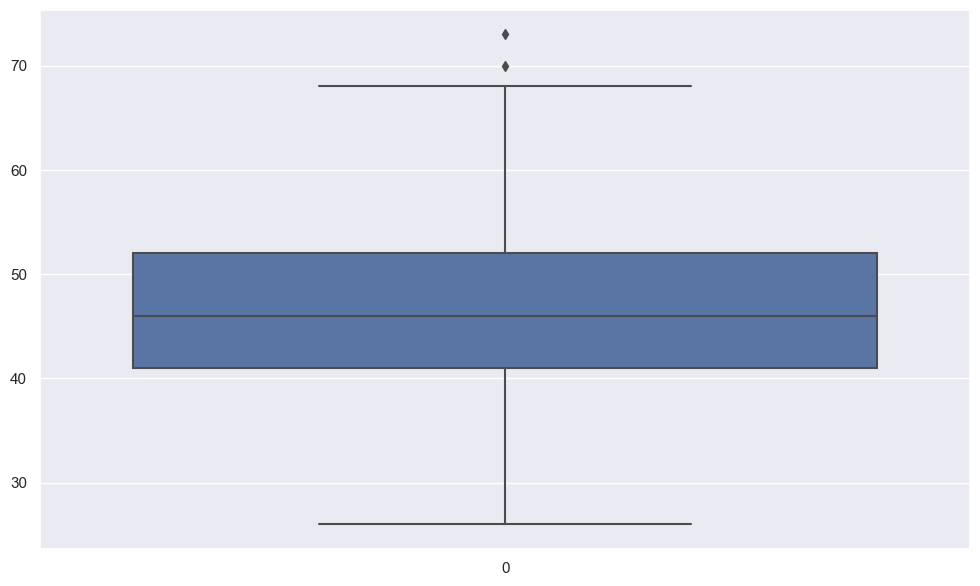

In [13]:
plt.figure(figsize = (12,7))
sns.boxplot(data['Customer_Age'])

In [14]:
data['Customer_Age'].median()

46.0

In [15]:
data['Customer_Age_median'] = data['Customer_Age'].fillna(46.0)

In [16]:
data.head

<bound method NDFrame.head of           Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single 

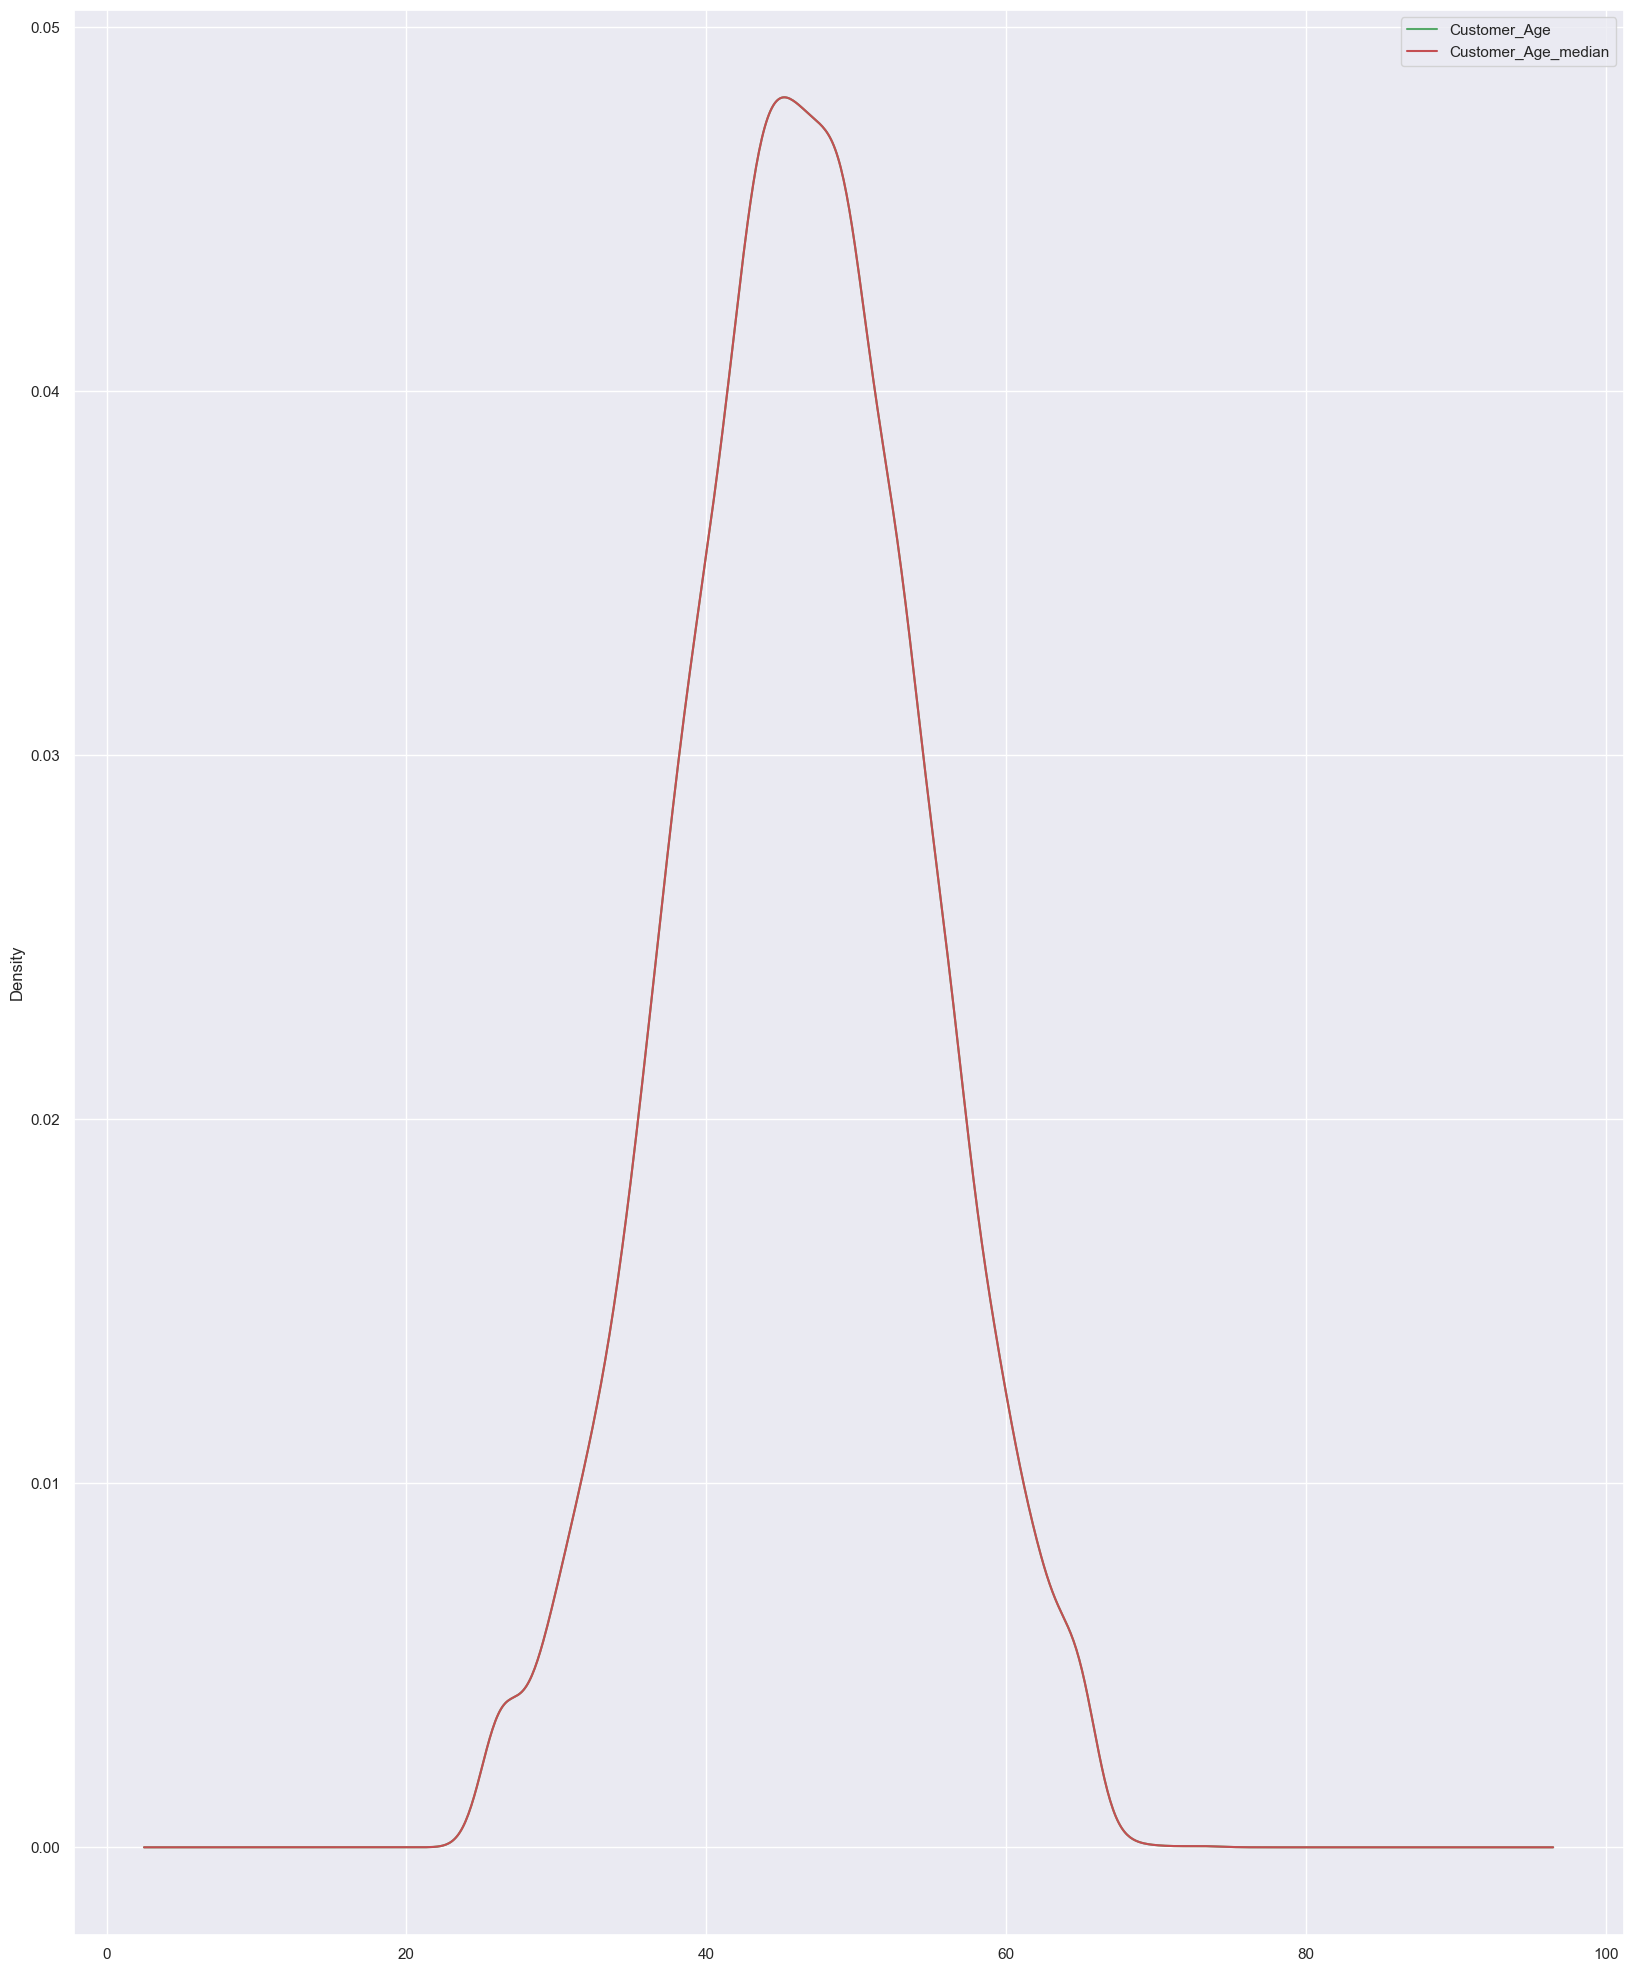

In [17]:
plt.figure(figsize = (20, 25))

data['Customer_Age'].plot(kind = 'kde', color = 'g')
data['Customer_Age_median'].plot(kind = 'kde', color = 'r')
plt.legend()

In [18]:
##Handling Categorial data

In [19]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Customer_Age_median
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,45
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,49
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,51
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,40
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,40


In [20]:
data.describe

<bound method NDFrame.describe of           Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Sin

In [21]:

data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
       'Customer_Age_median'],
      dtype='object')

In [22]:
columns = ["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
       "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]

In [23]:
### Last two values doesn't effect the required attributes so we can drop it

In [24]:
data.drop(columns = columns , inplace = True)
data.head

<bound method NDFrame.head of           Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single 

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


In [26]:
X = data[["Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]]

In [27]:
X["Attrition_Flag"].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [28]:
data.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
Customer_Age_median           45
dtype: int64

In [29]:
##Lets now change the encoding bar of our targeted 

In [30]:
from sklearn.preprocessing import LabelEncoder 

In [31]:
lec = LabelEncoder()

In [32]:
data["Attrition_Flag"] = lec.fit_transform (data["Attrition_Flag"])

In [33]:
data.head

<bound method NDFrame.head of        Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0                   1            45      M                3     High School   
1                   1            49      F                5        Graduate   
2                   1            51      M                3        Graduate   
3                   1            40      F                4     High School   
4                   1            40      M                3      Uneducated   
...               ...           ...    ...              ...             ...   
10122               1            50      M                2        Graduate   
10123               0            41      M                2         Unknown   
10124               0            44      F                1     High School   
10125               0            30      M                2        Graduate   
10126               0            43      F                2        Graduate   

      Marital_Status 

In [34]:
###Lets encode the other values too 

In [35]:
data["Gender"] = lec.fit_transform(data["Gender"])
data["Education_Level"] = lec.fit_transform(data["Education_Level"])
data["Marital_Status"] = lec.fit_transform(data["Marital_Status"])
data["Card_Category"] = lec.fit_transform(data["Card_Category"])
data["Income_Category"] = lec.fit_transform(data["Income_Category"])

In [36]:
data.head

<bound method NDFrame.head of        Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0                   1            45       1                3                3   
1                   1            49       0                5                2   
2                   1            51       1                3                2   
3                   1            40       0                4                3   
4                   1            40       1                3                5   
...               ...           ...     ...              ...              ...   
10122               1            50       1                2                2   
10123               0            41       1                2                6   
10124               0            44       0                1                3   
10125               0            30       1                2                2   
10126               0            43       0                2                2  

In [37]:
data["Attrition_Flag"].value_counts(normalize = True)

Attrition_Flag
1    0.83934
0    0.16066
Name: proportion, dtype: float64

<Axes: >

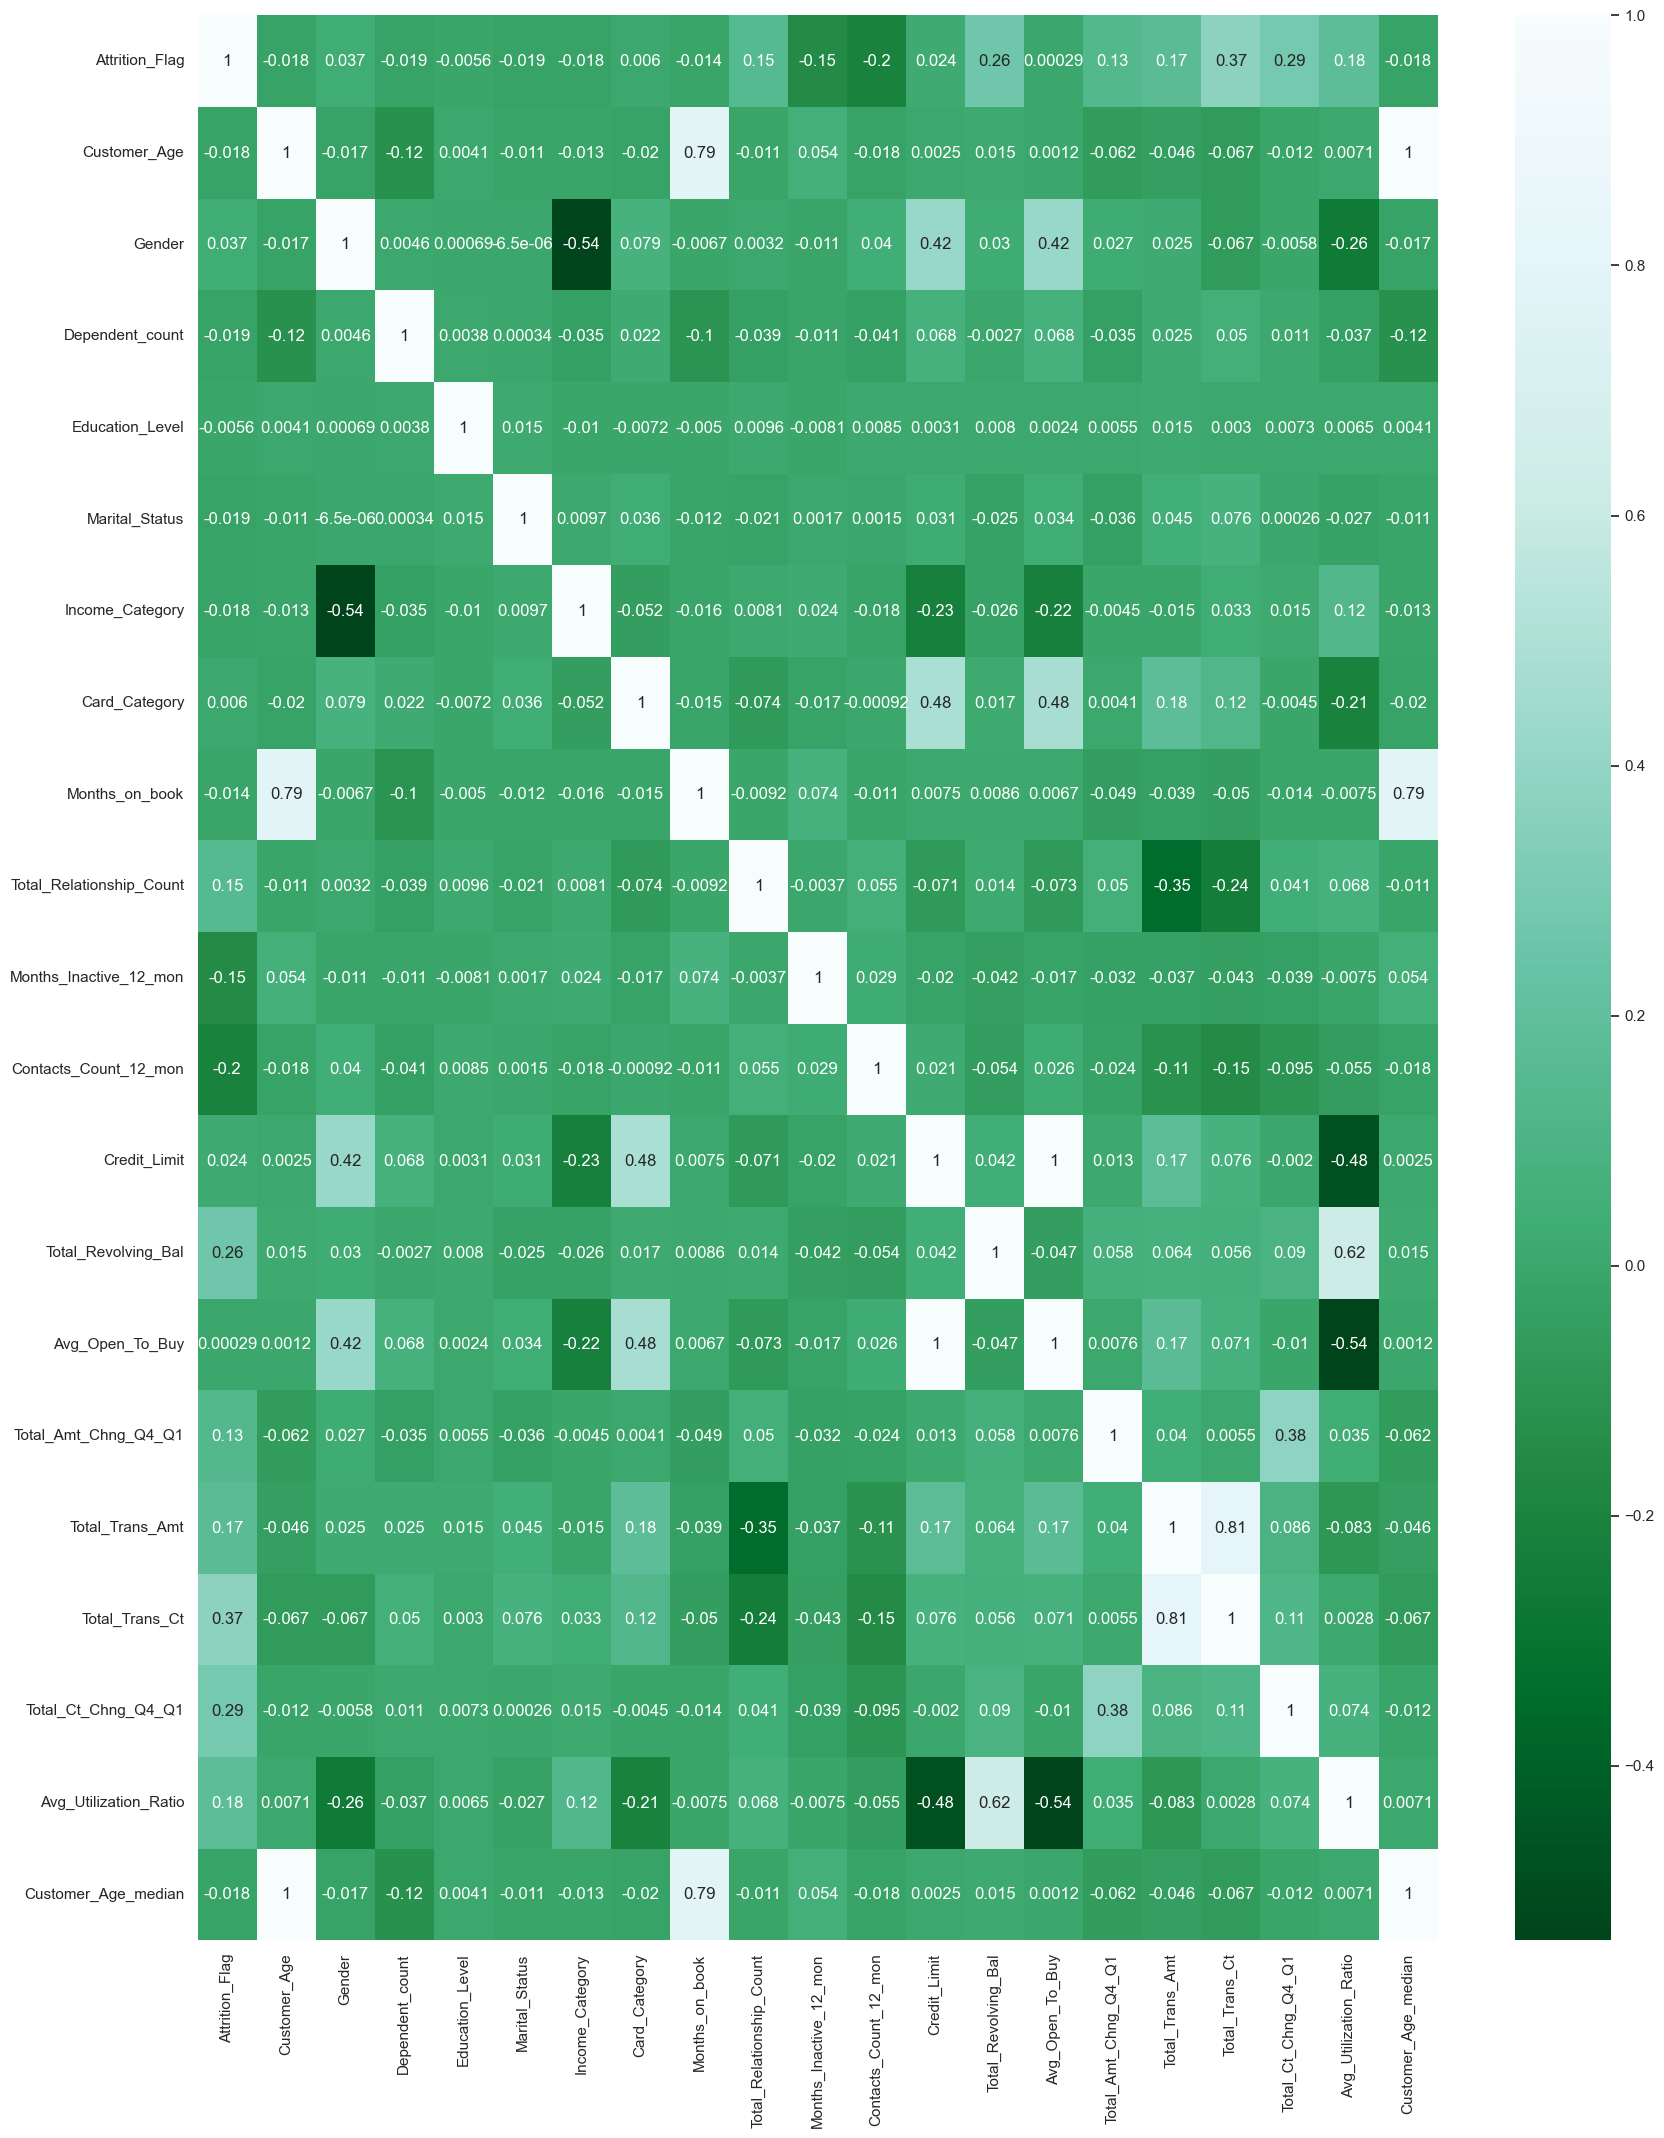

In [38]:
cor = data.corr()
f, ax = plt.subplots (figsize = (20,25))
sns.heatmap(cor, annot = True, cmap = 'BuGn_r')

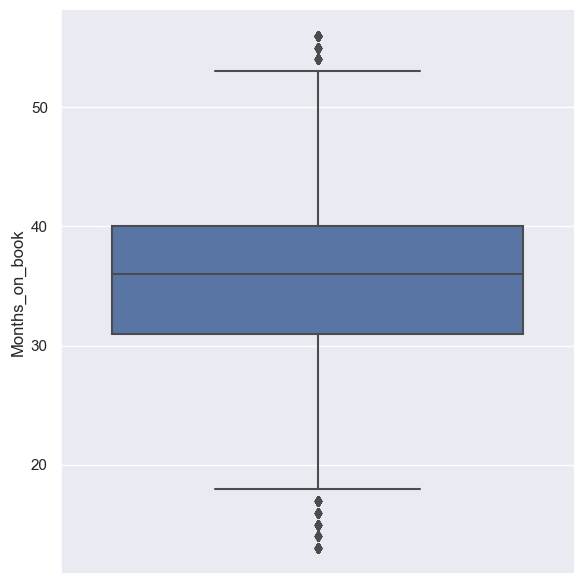

In [39]:
sns.catplot (y = "Months_on_book",kind = "box", data = data, height = 6 )

In [40]:
Q1 = data["Months_on_book"].quantile (0.25)
Q3 = data["Months_on_book"].quantile (0.75)

IQR = Q3 - Q1

Upper_Boundry = Q3 + 3* IQR
Lower_Boundry = Q1 - 3* IQR
print (Upper_Boundry)
print (Lower_Boundry)

67.0
4.0


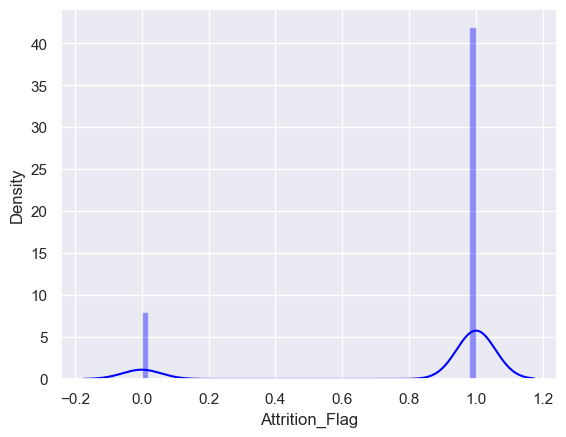

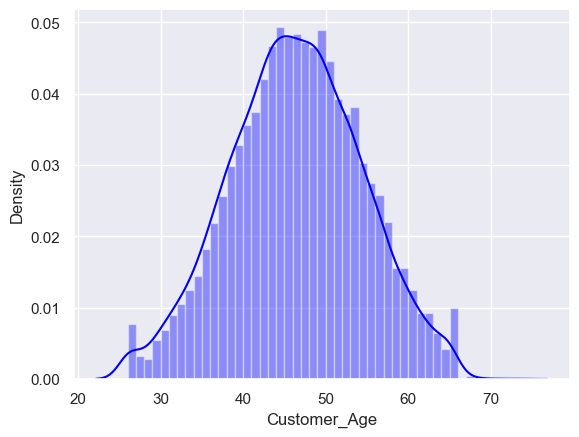

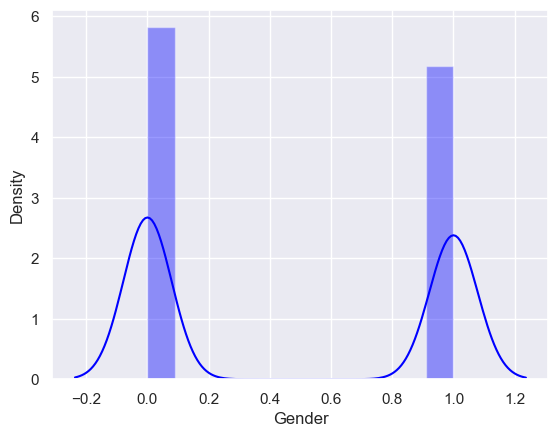

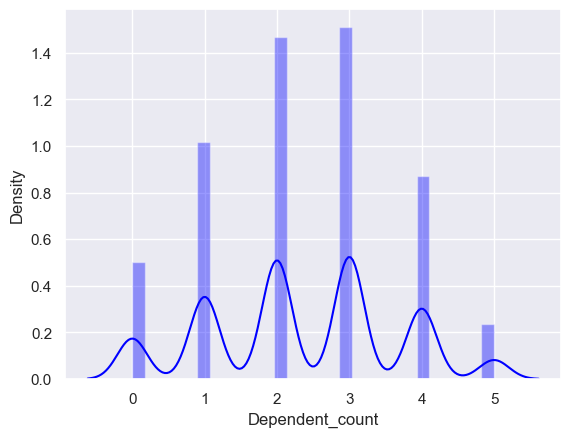

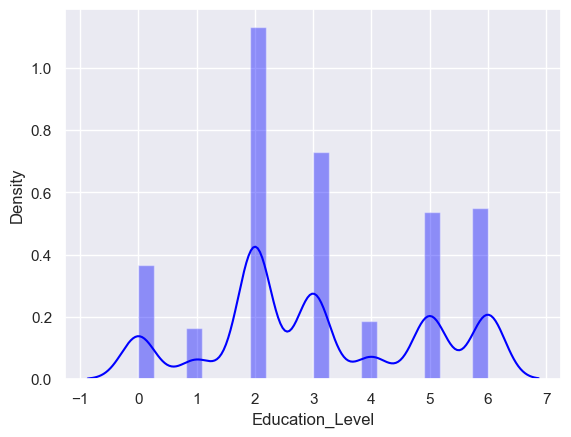

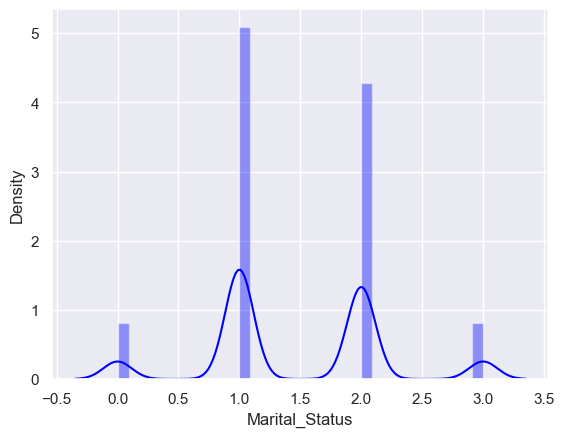

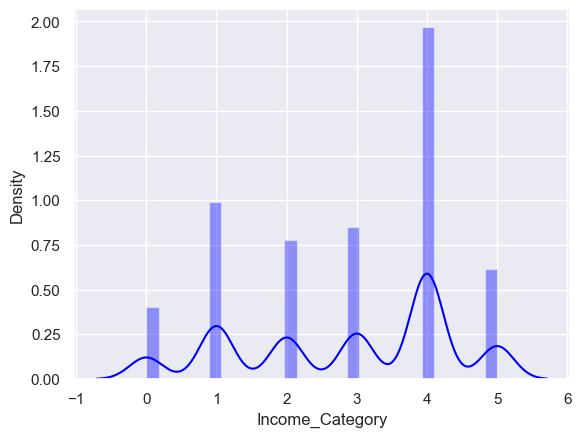

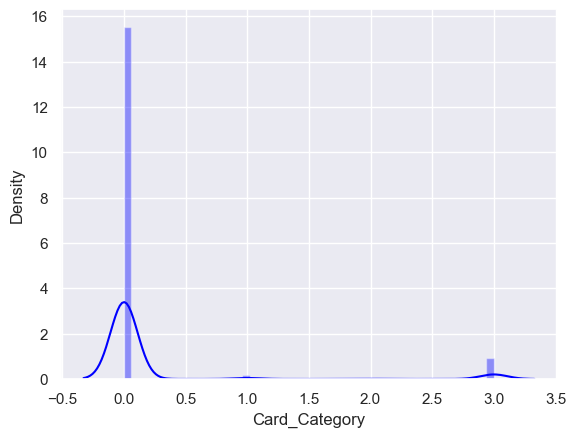

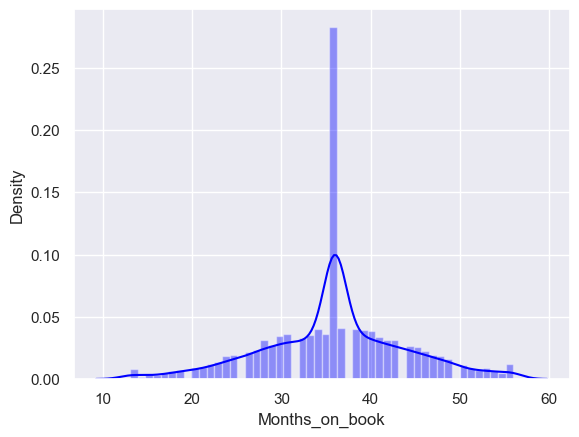

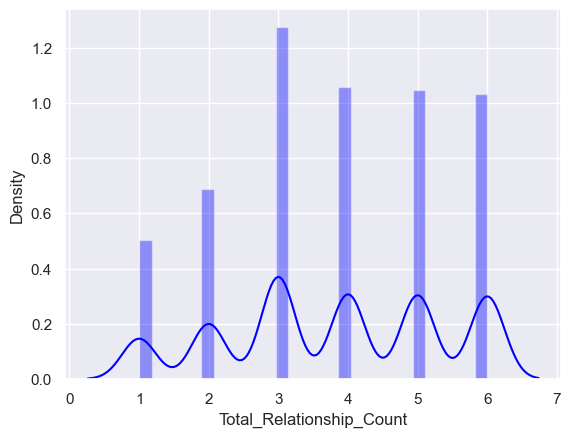

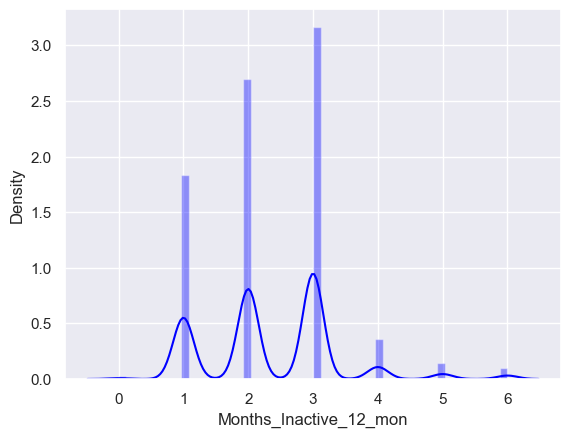

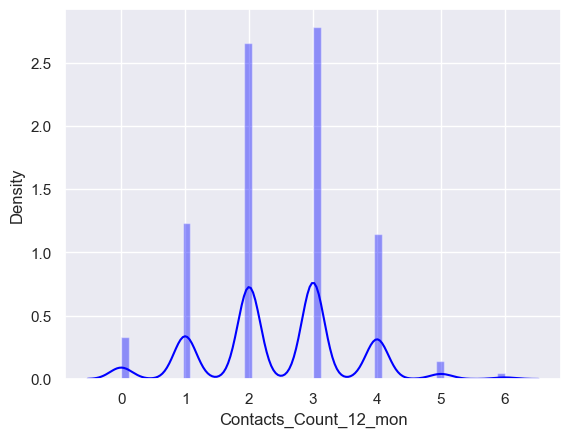

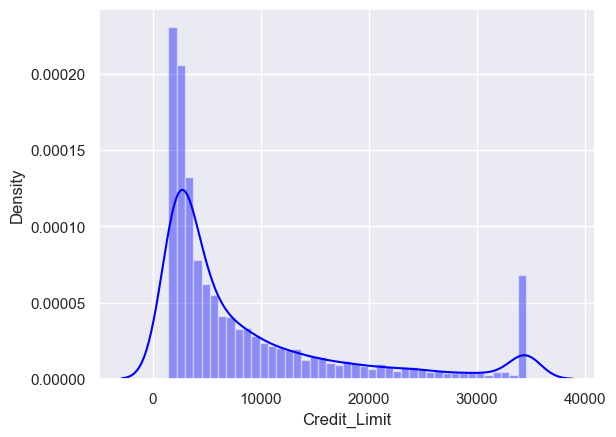

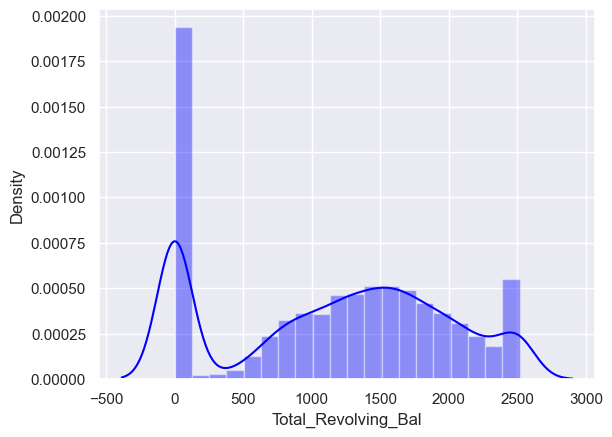

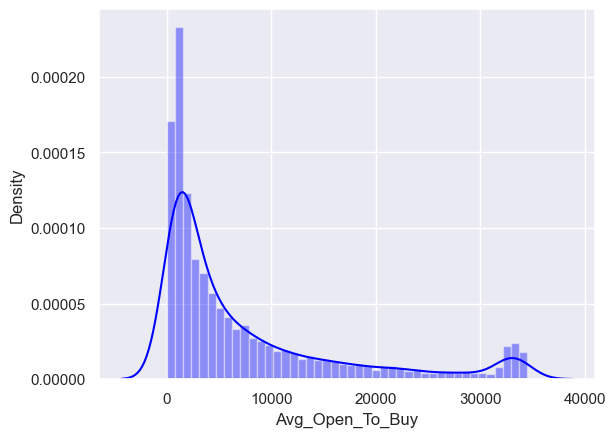

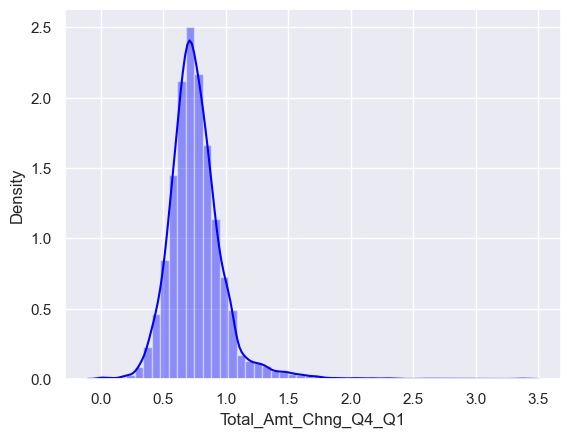

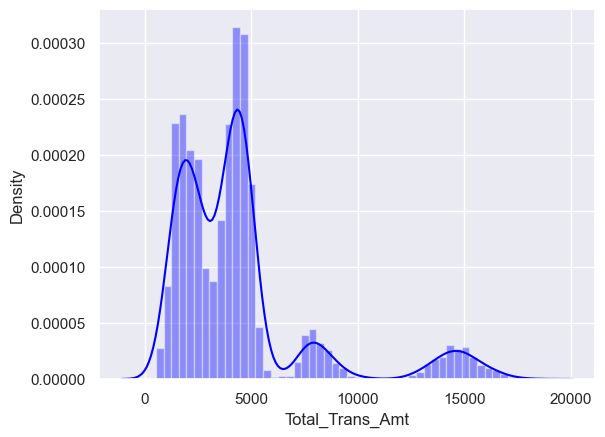

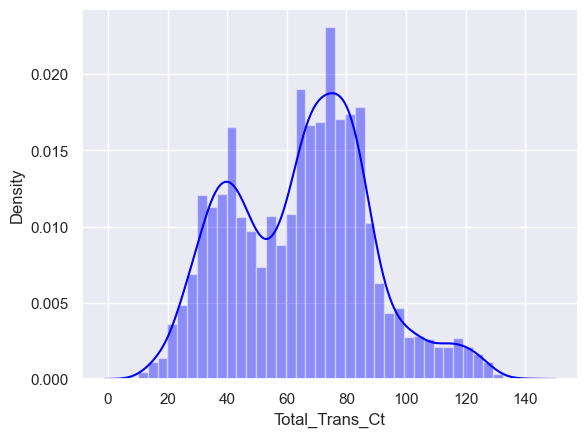

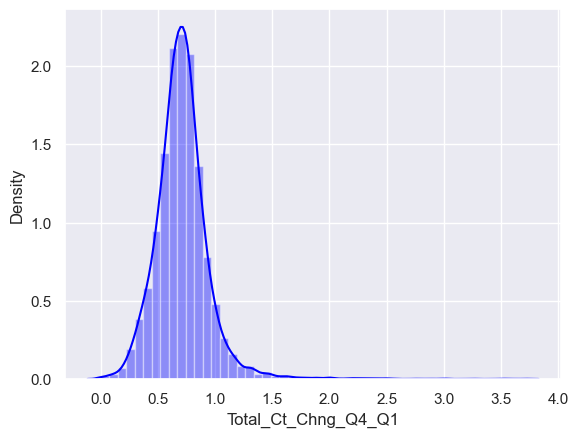

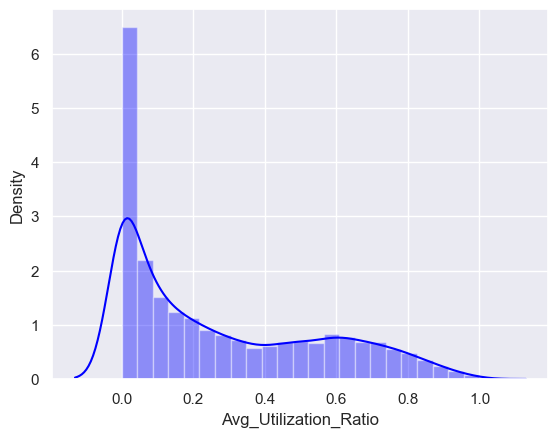

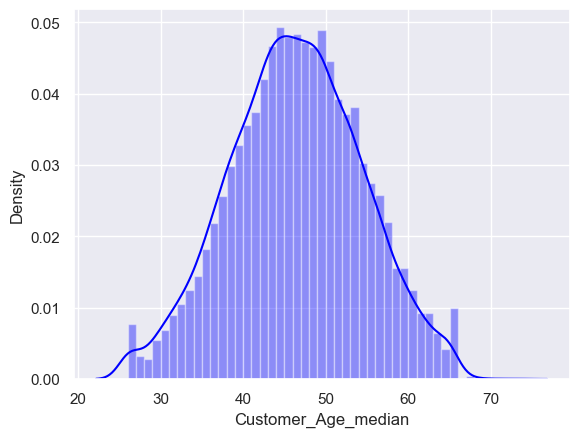

In [41]:
data_numerics_only = data.select_dtypes(include=np.number)
data_numerics_only
for column in data_numerics_only.columns:
    sns.distplot(data[column],color="blue")
    plt.show()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age_median
0,1,45,1,3,3,1,2,0,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,45
1,1,49,0,5,2,2,4,0,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,49
2,1,51,1,3,2,1,3,0,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,51
3,1,40,0,4,3,3,4,0,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40
4,1,40,1,3,5,1,2,0,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,40


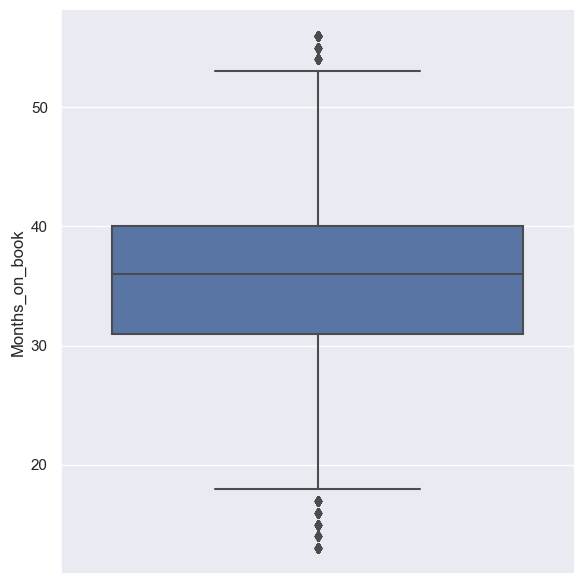

In [42]:
data = data[(data["Months_on_book"] <= Upper_Boundry) & (data["Months_on_book"]>=Lower_Boundry)]
sns.catplot (y = "Months_on_book",kind = "box", data = data, height = 6 )
data.head()

In [43]:
x = data.drop("Attrition_Flag", axis = 1)
y = data["Attrition_Flag"]


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

In [45]:
x_train, x_test, y_train, y_test.shape

(      Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
 233             44       1                3                4               0   
 9013            38       0                1                0               3   
 3043            63       0                2                2               2   
 6292            44       0                2                5               2   
 2474            60       1                2                2               1   
 ...            ...     ...              ...              ...             ...   
 5734            44       0                1                2               2   
 5191            53       0                3                3               0   
 5390            42       0                4                2               3   
 860             40       1                3                6               2   
 7270            53       1                4                3               2   
 
       Income_Category  Ca

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:

log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [48]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [50]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8677631578947368

In [51]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6632727052994138

In [52]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[  89,   43],
       [ 158, 1230]], dtype=int64)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [54]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
y_pred = knn.predict(x_test)

In [56]:
knn.score(x_train,y_train)

0.9199488788195654

In [57]:
accuracy_score(y_test,y_pred)

0.8875

In [58]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [61]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.879 total time=   0.2s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.890 total time=   0.2s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.893 total time=   0.2s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.899 total time=   0.2s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.893 total time=   0.2s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.887 total time=   0.2s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.900 total time=   0.2s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.898 total time=   0.2s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.902 total time=   0.2s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.893 total 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [62]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 5}

In [63]:
knn = KNeighborsClassifier(algorithm ='ball_tree', leaf_size=18, n_neighbors=12)

In [64]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=12)

In [65]:
knn.score(x_test,y_test)

0.8881578947368421

In [66]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [67]:
model.fit(x_train,y_train)

GaussianNB()

In [68]:
y_pred = model.predict(x_test)

In [69]:
print(accuracy_score(y_test, y_pred))

0.8835526315789474


In [70]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 145,  102],
       [  75, 1198]], dtype=int64)

In [71]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]


In [72]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8835526315789474

In [73]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.5870445344129555

In [74]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.6590909090909091

In [75]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.6209850107066381

In [76]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7640642939150403

In [77]:
from sklearn.svm import SVC

In [78]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [79]:
model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])

In [80]:
accuracy_score(y_test,model.predict(x_test))

0.8375

In [81]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
get_ipython().system('pip install pydotplus -U')
import pydotplus
get_ipython().system('pip install graphviz')
import graphviz
from sklearn import tree

In [82]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [83]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name


['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [ ]:
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)

graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")


+++
Image(graph.create_png())



In [86]:
clf.score(x_train,y_train)

1.0

In [87]:
py_pred = clf.predict(x_test)

In [88]:
clf.score(x_test,y_test)

0.9421052631578948

In [ ]:
##Which of the 5 models would you recommend for deployment in the real-world?
##According to me Decision tree as it has a good prediction score 

In [ ]:
## Is any model underfitting? If yes, what could be the possible reasons?
##Yes it is as it is unbalanced data